In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv' , 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='pass123',
    database='target'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Vineet/Downloads/target'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
db= mysql.connector.connect(host ="localhost",
                           user = "root",
                            password = "pass123",
                            database ="target")
cur = db.cursor()

## SQL QUERIES

In [109]:
query = """select distinct customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [12]:
query = """select count(customer_unique_id) as Numberuniquecustomers from customers"""
cur.execute(query)
data = cur.fetchall()
'Numberuniquecustomersdata', data[0][0]

('Numberuniquecustomersdata', 99441)

In [13]:
query="""SELECT COUNT(*) as numbers_orders_placed_in_2017
FROM target.orders
WHERE year(order_purchase_timestamp) = '2017'"""
cur.execute(query)
data = cur.fetchall()
data[0][0]

45101

In [115]:
query = """SELECT a.product_category,ROUND(SUM(a.price),2) AS CumulativeSumOfCategory FROM 
(SELECT  ot.price , p.product_category
FROM order_items ot
JOIN products p 
ON ot.product_id = p.product_id) a
WHERE a.product_category IS NOT NULL
GROUP BY a.product_category
ORDER BY CumulativeSumOfCategory DESC;"""
cur.execute(query)
data = cur.fetchall()
data

[('HEALTH BEAUTY', 1258681.34),
 ('Watches present', 1205005.68),
 ('bed table bath', 1036988.68),
 ('sport leisure', 988048.97),
 ('computer accessories', 911954.32),
 ('Furniture Decoration', 729762.49),
 ('Cool Stuff', 635290.85),
 ('housewares', 632248.66),
 ('automotive', 592720.11),
 ('Garden tools', 485256.46),
 ('toys', 483946.6),
 ('babies', 411764.89),
 ('perfumery', 399124.87),
 ('telephony', 323667.53),
 ('Furniture office', 273960.7),
 ('stationary store', 230943.23),
 ('PCs', 222963.13),
 ('pet Shop', 214315.41),
 ('musical instruments', 191498.88),
 ('electrostile', 190648.58),
 ('electronics', 160246.74),
 ('Games consoles', 157465.22),
 ('Fashion Bags and Accessories', 152823.54),
 ('Construction Tools Construction', 144677.59),
 ('Bags Accessories', 140429.98),
 ('ELECTRICES 2', 113317.74),
 ('Casa Construcao', 83088.12),
 ('home appliances', 80171.53),
 ('Agro Industria e Comercio', 72530.47),
 ('Room Furniture', 68916.56),
 ('fixed telephony', 59583.0),
 ('House com

## The percentage of orders that were paid in installments.

In [19]:
query = """SELECT 
(SUM(case when payment_installments >=1 then 1 else 0 end))/COUNT(*)*100 AS percentageDoingInstallments
FROM payments"""
cur.execute(query)
data = cur.fetchall()
data[0]

(Decimal('99.9981'),)

## The number of customers from each state. 

In [108]:
query = """SELECT CONCAT(UPPER(substring(customer_city,1,1)) , LOWER(substring(customer_city,2)))
,SUM(case when customer_unique_id IS NOT NULL then 1 ELSE 0 END ) 
as total_customers_in_each_state
FROM customers
GROUP BY customer_city
ORDER BY total_customers_in_each_state DESC"""
cur.execute(query)
data = cur.fetchall()
data

[('Sao paulo', Decimal('15540')),
 ('Rio de janeiro', Decimal('6882')),
 ('Belo horizonte', Decimal('2773')),
 ('Brasilia', Decimal('2131')),
 ('Curitiba', Decimal('1521')),
 ('Campinas', Decimal('1444')),
 ('Porto alegre', Decimal('1379')),
 ('Salvador', Decimal('1245')),
 ('Guarulhos', Decimal('1189')),
 ('Sao bernardo do campo', Decimal('938')),
 ('Niteroi', Decimal('849')),
 ('Santo andre', Decimal('797')),
 ('Osasco', Decimal('746')),
 ('Santos', Decimal('713')),
 ('Goiania', Decimal('692')),
 ('Sao jose dos campos', Decimal('691')),
 ('Fortaleza', Decimal('654')),
 ('Sorocaba', Decimal('633')),
 ('Recife', Decimal('613')),
 ('Florianopolis', Decimal('570')),
 ('Jundiai', Decimal('565')),
 ('Ribeirao preto', Decimal('510')),
 ('Belem', Decimal('447')),
 ('Nova iguacu', Decimal('442')),
 ('Barueri', Decimal('433')),
 ('Juiz de fora', Decimal('427')),
 ('Contagem', Decimal('426')),
 ('Sao goncalo', Decimal('409')),
 ('Mogi das cruzes', Decimal('383')),
 ('Vitoria', Decimal('380')),


## Calculate the number of orders per month overthe years


In [22]:
query = """SELECT MONTHNAME(order_purchase_timestamp) as months,COUNT(order_id) as numberoforders 
FROM target.orders
GROUP BY months
HAVING numberoforders IS NOT NULL
ORDER BY numberoforders desc"""
cur.execute(query)
data = cur.fetchall()
data

[('August', 10843),
 ('May', 10573),
 ('July', 10318),
 ('March', 9893),
 ('June', 9412),
 ('April', 9343),
 ('February', 8508),
 ('January', 8069),
 ('November', 7544),
 ('December', 5674),
 ('October', 4959),
 ('September', 4305)]

## calculate the number of orders permonth in 2018

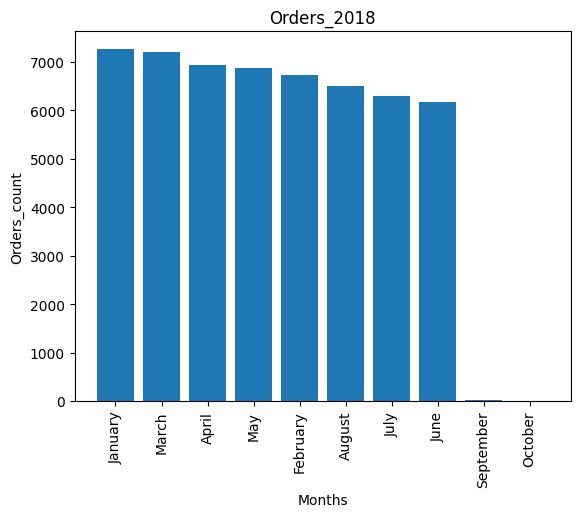

In [53]:
query = """SELECT COUNT(order_id) as numberoforders, MONTHNAME(order_purchase_timestamp) as Months
FROM target.orders
WHERE YEAR(order_purchase_timestamp) ='2018'
GROUP BY Months
ORDER BY numberoforders DESC"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns = ["OrdersIn2018","Month"])
df
ax=plt.bar(df["Month"] , df["OrdersIn2018"])
plt.xlabel("Months")
plt.ylabel("Orders_count")
plt.title("Orders_2018")
plt.xticks(rotation =90)

plt.show()

## Average number of products per order, grouped by customer city.

In [77]:
query = """with orders_per_cust as
(SELECT o.customer_id, ot.product_id,COUNT(ot.order_item_id) as opc
FROM order_items ot
JOIN orders o
ON ot.order_id = o.order_id
GROUP BY o.customer_id , ot.product_id)

SELECT customers.customer_city , ROUND(AVG(orders_per_cust.opc),2) as Average_orders_eachstate
FROM customers
JOIN orders_per_cust
ON customers.customer_id = orders_per_cust.customer_id
GROUP BY customers.customer_city
ORDER BY Average_orders_eachstate DESC
;
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns=["City","Avg_orders"])
df.head(10)


,City,Avg_orders
0,datas,6.00
1,candido godoi,6.00
2,matias olimpio,5.00
3,morro de sao paulo,4.00
4,cidelandia,4.00
5,inconfidentes,3.50
6,capela,3.00
7,ubata,3.00
8,nova esperanca do sul,3.00
9,pedregulho,3.00


##  the percentage of total revenue contributed by each product category.

In [83]:
query = """SELECT p.product_category 
, CONCAT (ROUND((SUM(ot.price) /(select SUM(price) FROM order_items))*100,2),'%')sales
FROM products p
JOIN order_items ot
ON p.product_id = ot.product_id
GROUP BY product_category
ORDER BY sales DESC"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns=["Category","percentagesales"])
df.head(10)

,Category,percentagesales
0,HEALTH BEAUTY,9.26%
1,Watches present,8.87%
2,bed table bath,7.63%
3,sport leisure,7.27%
4,computer accessories,6.71%
5,Furniture Decoration,5.37%
6,Cool Stuff,4.67%
7,housewares,4.65%
8,automotive,4.36%
9,Garden tools,3.57%


## Identify the correlation between product price and the number of times a product has been purchased.

In [88]:
query = """SELECT p.product_category , FLOOR(avg(ot.price)) as Price
, COUNT(ot.order_item_id) as Numberoforders
FROM products p
JOIN order_items ot
ON p.product_id = ot.product_id
WHERE product_category IS NOT NULL
GROUP BY product_category
ORDER BY Numberoforders DESC """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns = ["Category","Avg_price", "Order_count"])

df.head(10)
arr1 = df["Avg_price"]
arr2 = df["Order_count"]
np.corrcoef([arr1,arr2])



array([[ 1.        , -0.10604342],
       [-0.10604342,  1.        ]])

##  The total revenue generated by each seller, and rank them by revenue.

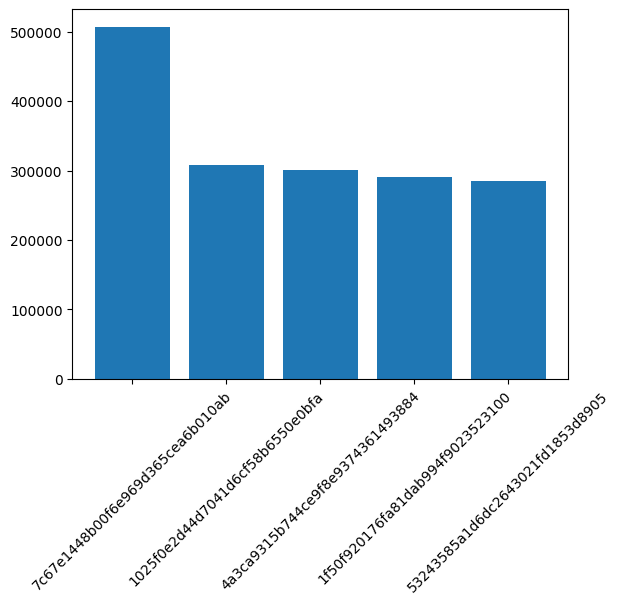

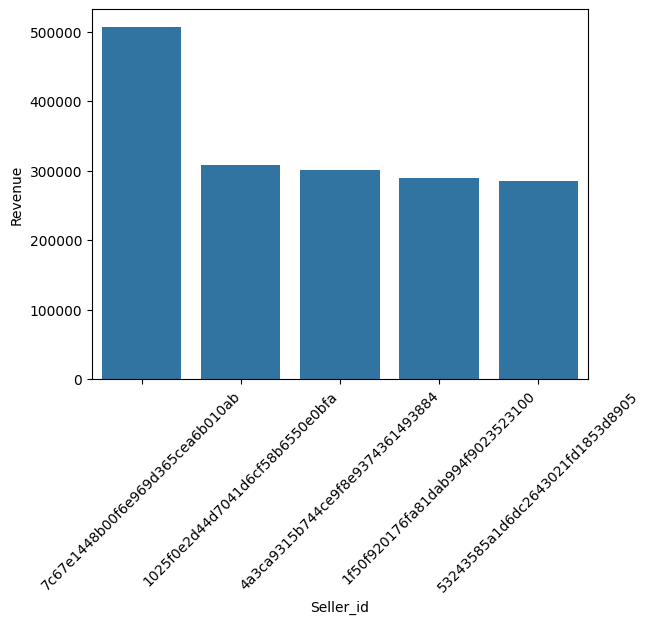

In [102]:
query = """SELECT *  ,
DENSE_RANK() OVER(order by Revenue_generatedbyseller DESC) as RankingOfReveneue_generated_sellers
FROM
(SELECT ot.seller_id,SUM(p.payment_value) as Revenue_generatedbyseller
FROM payments p 
JOIN order_items ot
ON p.order_id = ot.order_id
GROUP BY ot.seller_id)as T1"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns=["Seller_id", "Revenue","Rank"])
df = df.head(5)
plt.bar(df["Seller_id"],df["Revenue"])
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x="Seller_id",y="Revenue",data = df)

plt.xticks(rotation = 45)
plt.show()


## The moving average of order values for each customer over their order history.

In [107]:
query = """SELECT * , 
avg(Price) OVER( Partition by c.customer_id ORDER BY o.order_purchase_timestamp asc rows between 2 preceding and current row)
as 3Days_moving_average_orders_price
FROM
(SELECT  c.customer_id , o.order_purchase_timestamp , ot.price as Price
FROM customers c 
JOIN orders o 
ON c.customer_id = o.customer_id
JOIN order_items ot 
ON  ot.order_id = o.order_id ) as T1"""
cur.execute(query)
data = cur.fetchall()
data 
df = pd.DataFrame(data,columns=["Customer_id","Datetimestamp","Price","3daysMovingAverage"])
df = df.head(10)
df



,Customer_id,Datetimestamp,Price,3daysMovingAverage
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,89.80,89.800003
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,54.90,54.900002
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,179.99,179.990005
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,149.90,149.899994
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,93.00,93.000000
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,59.99,59.990002
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,34.30,34.299999
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,120.90,120.900002
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,69.99,69.989998
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1107.00,1107.000000


## The cumulative sales per month for each year.

In [111]:
query = """SELECT t1.year , t1.Month, t1.Payment_amount,
SUM(Payment_amount) OVER(ORDER BY t1.Year , t1.Month rows between unbounded preceding and current row) as Cumulative_sum
FROM
(SELECT YEAR(o.order_purchase_timestamp) Year,
MONTH(o.order_purchase_timestamp) Month,
ROUND(SUM(p.payment_value),2) as Payment_amount
FROM orders o
JOIN payments p
ON o.order_id = p.order_id 
GROUP BY Year , month 
ORDER BY year , month )as t1
 """
cur.execute(query)
data = cur.fetchall()
data 

[(2016, 9, 252.24, 252.24),
 (2016, 10, 59090.48, 59342.72),
 (2016, 12, 19.62, 59362.340000000004),
 (2017, 1, 138488.04, 197850.38),
 (2017, 2, 291908.01, 489758.39),
 (2017, 3, 449863.6, 939621.99),
 (2017, 4, 417788.03, 1357410.02),
 (2017, 5, 592918.82, 1950328.8399999999),
 (2017, 6, 511276.38, 2461605.2199999997),
 (2017, 7, 592382.92, 3053988.1399999997),
 (2017, 8, 674396.32, 3728384.4599999995),
 (2017, 9, 727762.45, 4456146.909999999),
 (2017, 10, 779677.88, 5235824.789999999),
 (2017, 11, 1194882.8, 6430707.589999999),
 (2017, 12, 878401.48, 7309109.069999998),
 (2018, 1, 1115004.18, 8424113.249999998),
 (2018, 2, 992463.34, 9416576.589999998),
 (2018, 3, 1159652.12, 10576228.709999997),
 (2018, 4, 1160785.48, 11737014.189999998),
 (2018, 5, 1153982.15, 12890996.339999998),
 (2018, 6, 1023880.5, 13914876.839999998),
 (2018, 7, 1066540.75, 14981417.589999998),
 (2018, 8, 1022425.32, 16003842.909999998),
 (2018, 9, 4439.54, 16008282.449999997),
 (2018, 10, 589.67, 16008872.11

## The year-over-year growth rate of total sales.

In [114]:
query = """SELECT * ,
CONCAT(ROUND(((t1.YearWiseSales - LAG(t1.YearWiseSales) OVER(ORDER BY year asc))/
LAG(t1.YearWiseSales) OVER(ORDER BY year asc)),2)*100 ,'%') as GrowthPercentage
FROM
(SELECT YEAR(o.order_purchase_timestamp) as year , SUM(p.payment_value) as YearWiseSales
FROM orders o
JOIN payments p
ON o.order_id = p.order_id
GROUP BY year
ORDER BY year asc)as t1"""
cur.execute(query)
data = cur.fetchall()
data 
df = pd.DataFrame(data,columns=["Year","SalesPerYear","GrowthPercentage"])
df

,Year,SalesPerYear,GrowthPercentage
0,2016,5.936234e+04,None
1,2017,7.249747e+06,12113%
2,2018,8.699763e+06,20%


## Identify the top 3 customers who spent the most money in each year.

In [130]:
query = """with a as (SELECT o.customer_id ,year(o.order_purchase_timestamp) as year,SUM(ot.price) Spent_by_each_customer,
dense_rank() OVER(partition by year(o.order_purchase_timestamp) order by SUM(ot.price) DESC ) d_rank
FROM order_items ot
JOIN orders o
ON ot.order_id = o.order_id
GROUP BY o.customer_id, year)

SELECT a.customer_id ,a.d_rank , a.Spent_by_each_customer ,a.year 
FROM a 
WHERE d_rank <= 3;
"""
cur.execute(query)
data = cur.fetchall()
data 
df = pd.DataFrame(data,columns=["Id","rank","Sales","Year"])